In [71]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                     model = "facebook/bart-large-mnli")

In [72]:
train = []
sentences = []
clas =[]
alls =[]
with open("twitter-2016train-A.txt", 'r', encoding = "utf-8") as f:
    lines = f.readlines()
    for line in lines:
        alls.append(line)
        part = line.split("\t")
        sentences.append(part[2])
        clas.append(part[1])
  

In [73]:
print(len(sentences))
print(len(clas))
print(len(alls))

6000
6000
6000


In [74]:
print([i for i, a in enumerate(alls) if not a])
print(len([i for i, a in enumerate(alls) if not a]))

[]
0


In [75]:
import re,io
Comm =[]
for x in sentences:
    sent = re.sub(r'http\S+', '', x)
    sent1 =  re.sub(r'@\w+', '', sent)
    sent2 = re.sub(r'[^\w\s]','',sent1)
    sent3 = sent2.strip()
    a = " ".join(sent3.split())
    Comm.append(a)
print(Comm[0])
print(Comm[0:3])

dear the newOoffice for Mac is great and all but no Lync update Cmon
['dear the newOoffice for Mac is great and all but no Lync update Cmon', 'how about you make a system that doesnt eat my friggin discs This is the 2nd time this has happened and I am so sick of it', 'I may be ignorant on this issue but should we celebrate s parental leave changes Doesnt the gender divide suggest 12']


In [76]:
print(len(Comm))
print(len(clas))

6000
6000


In [44]:
test_sentence = Comm[0:1000]

In [77]:
print([i for i, a in enumerate(sentences) if not a])
print(len([i for i, a in enumerate(sentences) if not a]))

[]
0


In [78]:
print(clas[15])

neutral


In [79]:
rslt_1 = []
rslt_2 = []
rslt_3 = []
rslt_4 = []
candidate_labels_1 = ['anger','saddness', 'disgust','fear','joy','happiness']
candidate_labels_2 = ['admiration','affection','anguish','caution','confusion','desire','disappointment','attraction','envy','excitement']
candidate_labels_3 = ['grief','hope','horror','joy','love','loneliness','pleasure','fear','generosity','pleasure']
candidate_labels_4 = ['rage','relief','sadness','satisfaction','sorrow','wonder','sympathy','shame','terror','panic']
for x in Comm:
    skore_1 = classifier(x, candidate_labels_1, multi_label =True)
    skore_2 = classifier(x, candidate_labels_2, multi_label =True)
    skore_3 = classifier(x, candidate_labels_3, multi_label =True)
    skore_4 = classifier(x, candidate_labels_4, multi_label =True)
    rslt_1.append(skore_1)
    rslt_2.append(skore_2)
    rslt_3.append(skore_3)
    rslt_4.append(skore_4)

In [80]:
print(len(rslt_1))
print(len(rslt_2))
print(len(rslt_3))
print(len(rslt_4))

6000
6000
6000
6000


In [81]:
import pandas as pd
data_items_1 = rslt_1[0].items()
data_list_1 = list(data_items_1)
df_1 = pd.DataFrame(data_list_1)
column_names = ["sequence", "score", "labels"]
df1_1 = pd.DataFrame(columns = column_names)
df1_1.loc[1] = [df_1[1][0]] + [df_1[1][2][0]] +[df_1[1][1][0]] 

In [82]:
import pandas as pd
data_items_2 = rslt_2[0].items()
data_list_2 =list(data_items_2)
df_2 = pd.DataFrame(data_list_2)
column_names = ["sequence", "score", "labels"]
df1_2 = pd.DataFrame(columns = column_names)
df1_2.loc[1] = [df_2[1][0]] + [df_2[1][2][0]] +[df_2[1][1][0]]

In [83]:
import pandas as pd
data_items_3 = rslt_3[0].items()
data_list_3 =list(data_items_3)
df_3 = pd.DataFrame(data_list_3)
column_names = ["sequence", "score", "labels"]
df1_3 = pd.DataFrame(columns = column_names)
df1_3.loc[1] = [df_3[1][0]] + [df_3[1][2][0]] +[df_3[1][1][0]]

In [84]:
import pandas as pd
data_items_4 = rslt_4[0].items()
data_list_4 =list(data_items_4)
df_4 = pd.DataFrame(data_list_4)
column_names = ["sequence", "score", "labels"]
df1_4 = pd.DataFrame(columns = column_names)
df1_4.loc[1] = [df_4[1][0]] + [df_4[1][2][0]] +[df_4[1][1][0]]

In [85]:
display(df1_1)
display(df1_2)
display(df1_3)
display(df1_4)

,sequence,score,labels
1,dear the newOoffice for Mac is great and all b...,0.502128,saddness


,sequence,score,labels
1,dear the newOoffice for Mac is great and all b...,0.968073,admiration


,sequence,score,labels
1,dear the newOoffice for Mac is great and all b...,0.898246,grief


,sequence,score,labels
1,dear the newOoffice for Mac is great and all b...,0.62475,sorrow


In [86]:
import pandas as pd
import pandas as pd 
data_1 =[]
data_2 = []
data_3 = []
data_4 = []
for x in range(len(rslt_1)):
    data_items_1 = rslt_1[x].items()
    data_list_1 = list(data_items_1)
    df_1 = pd.DataFrame(data_list_1)
    column_names = ["sequence", "score", "labels"]
    df1_1= pd.DataFrame(columns = column_names)
    df1_1.loc[1] = [df_1[1][0]] + [df_1[1][2][0]] +[df_1[1][1][0]]
    data_1.append(df1_1)
    result_1 = pd.concat(data_1)
pandas.set_option('display.max_rows', None)


In [87]:
import pandas as pd
import pandas as pd 

for x in range(len(rslt_2)):
    data_items_2 = rslt_2[x].items()
    data_list_2 = list(data_items_2)
    df_2 = pd.DataFrame(data_list_2)
    column_names = ["sequence", "score", "labels"]
    df1_2= pd.DataFrame(columns = column_names)
    df1_2.loc[1] = [df_2[1][0]] + [df_2[1][2][0]] +[df_2[1][1][0]]
    data_2.append(df1_2)
    result_2 = pd.concat(data_2)
pandas.set_option('display.max_rows', None)

In [88]:
import pandas as pd
import pandas as pd 

for x in range(len(rslt_3)):
    data_items_3 = rslt_3[x].items()
    data_list_3 = list(data_items_3)
    df_3 = pd.DataFrame(data_list_3)
    column_names = ["sequence", "score", "labels"]
    df1_3= pd.DataFrame(columns = column_names)
    df1_3.loc[1] = [df_3[1][0]] + [df_3[1][2][0]] +[df_3[1][1][0]]
    data_3.append(df1_3)
    result_3 = pd.concat(data_3)
pandas.set_option('display.max_rows', None)

In [89]:
import pandas as pd
import pandas as pd 

for x in range(len(rslt_4)):
    data_items_4 = rslt_4[x].items()
    data_list_4 = list(data_items_4)
    df_4 = pd.DataFrame(data_list_4)
    column_names = ["sequence", "score", "labels"]
    df1_4= pd.DataFrame(columns = column_names)
    df1_4.loc[1] = [df_4[1][0]] + [df_4[1][2][0]] +[df_4[1][1][0]]
    data_4.append(df1_4)
    result_4 = pd.concat(data_4)
pandas.set_option('display.max_rows', None)

In [90]:
print(len(result_1))
print(len(result_2))
print(len(result_3))
print(len(result_4))
print(len(clas))

6000
6000
6000
6000
6000


In [91]:
for i in range(len(test_sentence)):
    result_1['real_class'] = clas[0:6000]
pandas.set_option('display.max_rows', None)


In [93]:
for i in range(len(test_sentence)):
    result_2['real_class'] = clas[0:6000]
pandas.set_option('display.max_rows', None)

In [94]:
for i in range(len(test_sentence)):
    result_3['real_class'] = clas[0:6000]
pandas.set_option('display.max_rows', None)

In [95]:
for i in range(len(test_sentence)):
    result_4['real_class'] = clas[0:6000]
pandas.set_option('display.max_rows', None)

In [96]:
X_1 = result_1["labels"].to_numpy()
X_2 = result_2["labels"].to_numpy()
X_3 = result_3["labels"].to_numpy()
X_4 = result_4["labels"].to_numpy()
y_1 = result_1["real_class"].to_numpy()
y_2 = result_2["real_class"].to_numpy()
y_3= result_3["real_class"].to_numpy()
y_4= result_4["real_class"].to_numpy()
print(len(X_1))

print(len(y_1))

6000
6000


In [97]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()

In [98]:
integer_encoded_1 = label_encoder.fit_transform(X_1)
integer_encoded_2 = label_encoder.fit_transform(X_2)
integer_encoded_3 = label_encoder.fit_transform(X_3)
integer_encoded_4 = label_encoder.fit_transform(X_4)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_1= integer_encoded_1.reshape(len(integer_encoded_1), 1)
integer_encoded_2= integer_encoded_2.reshape(len(integer_encoded_2), 1)
integer_encoded_3= integer_encoded_3.reshape(len(integer_encoded_3), 1)
integer_encoded_4= integer_encoded_4.reshape(len(integer_encoded_4), 1)
onehot_encoded_1 = onehot_encoder.fit_transform(integer_encoded_1)
onehot_encoded_2 = onehot_encoder.fit_transform(integer_encoded_2)
onehot_encoded_3 = onehot_encoder.fit_transform(integer_encoded_3)
onehot_encoded_4 = onehot_encoder.fit_transform(integer_encoded_4)

In [99]:
label_encoder.fit(y)
Y_1 = label_encoder.transform(y_1)
Y_2 = label_encoder.transform(y_2)
Y_3 = label_encoder.transform(y_3)
Y_4 = label_encoder.transform(y_4)

In [100]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [101]:
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

In [102]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>lr 0.611 (0.016)
>knn 0.553 (0.075)
>cart 0.611 (0.016)
>svm 0.611 (0.016)
>bayes 0.555 (0.016)


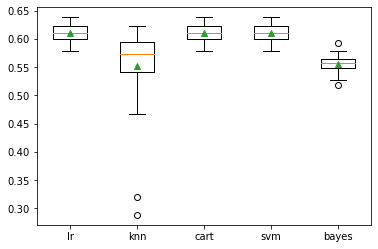

In [103]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model,onehot_encoded_1, Y_1)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.599 (0.018)
>knn 0.530 (0.044)
>cart 0.599 (0.018)
>svm 0.599 (0.018)
>bayes 0.393 (0.027)


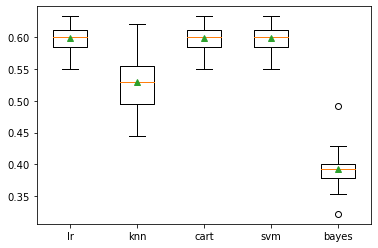

In [104]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model,onehot_encoded_2, Y_2)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.599 (0.018)
>knn 0.485 (0.074)
>cart 0.600 (0.018)
>svm 0.599 (0.018)
>bayes 0.581 (0.012)


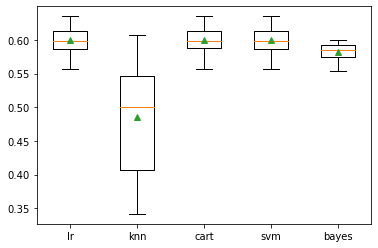

In [105]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model,onehot_encoded_3, Y_3)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.564 (0.010)
>knn 0.535 (0.069)
>cart 0.564 (0.010)
>svm 0.564 (0.010)
>bayes 0.567 (0.012)


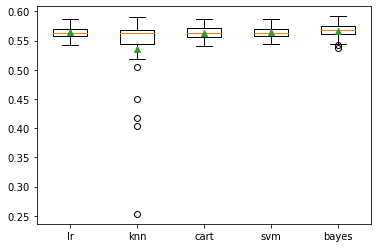

In [106]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model,onehot_encoded_4, Y_4)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [47]:
import pandas as pd
data_items = rslt[0].items()
data_list =list(data_items)
df = pd.DataFrame(data_list)
column_names = ["sequence", "score", "labels"]
df1 = pd.DataFrame(columns = column_names)
df1.loc[1] = [df[1][0]] + [df[1][2][0]] +[df[1][1][0]]

In [48]:
import pandas as pd
import pandas
data =[]
for x in range(len(rslt)):
    data_items = rslt[x].items()
    #print(data_items)
    data_list =list(data_items)
    df = pd.DataFrame(data_list)
    column_names = ["sequence", "score", "labels"]
    df1 = pd.DataFrame(columns = column_names)
    df1.loc[1] = [df[1][0]] + [df[1][2][0]] +[df[1][1][0]]
    data.append(df1)
    result = pd.concat(data)
pandas.set_option('display.max_rows', None)
display(result)

,sequence,score,labels
1,dear the newOoffice for Mac is great and all b...,0.502128,saddness
1,how about you make a system that doesnt eat my...,0.850469,disgust
1,I may be ignorant on this issue but should we ...,0.110029,joy
1,Thanks to I just may be switching over to,0.210297,joy
1,If I make a game as a windows10 Universal App ...,0.091681,joy
1,Microsoft I may not prefer your gaming branch ...,0.135211,joy
1,I will be downgrading and let Windows10 be out...,0.876145,disgust
1,2nd computer with same error Windows10fail Gue...,0.913368,saddness
1,Just ordered my 1st ever tablet Surface Pro 3 ...,0.828952,joy
1,After attempting a reinstall it still bricks s...,0.732504,saddness


In [49]:
print(len(result))
print(len(clas))

6000
6000


In [50]:
for i in range(len(test_sentence)):
    result['real_class'] = clas[0:6000]
pandas.set_option('display.max_rows', None)
display(result)

,sequence,score,labels,real_class
1,dear the newOoffice for Mac is great and all b...,0.502128,saddness,negative
1,how about you make a system that doesnt eat my...,0.850469,disgust,negative
1,I may be ignorant on this issue but should we ...,0.110029,joy,negative
1,Thanks to I just may be switching over to,0.210297,joy,negative
1,If I make a game as a windows10 Universal App ...,0.091681,joy,neutral
1,Microsoft I may not prefer your gaming branch ...,0.135211,joy,positive
1,I will be downgrading and let Windows10 be out...,0.876145,disgust,negative
1,2nd computer with same error Windows10fail Gue...,0.913368,saddness,negative
1,Just ordered my 1st ever tablet Surface Pro 3 ...,0.828952,joy,positive
1,After attempting a reinstall it still bricks s...,0.732504,saddness,negative


In [51]:
X = result["labels"].to_numpy()
y = result["real_class"].to_numpy()

print(len(X))

print(len(y))

6000
6000


In [52]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(X)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [53]:
label_encoder.fit(y)
y_a = label_encoder.transform(y)
print(y_a)

[0 0 0 ... 1 2 1]


In [54]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(onehot_encoded, y_a, test_size=0.20, random_state= 42, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size = 0.20, random_state = 1, shuffle = True)

In [56]:
input_dim = onehot_encoded.shape[1]

In [57]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Dense(64, input_dim =input_dim, activation = 'relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

In [58]:
model.compile(loss='categorical_crossentropy',
             optimizer ='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                448       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [59]:
hist =model.fit(X_train, y_train, epochs = 100, batch_size = 128, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/100
30/30 [==============================] - 2s 18ms/step - loss: 0.0000e+00 - accuracy: 0.3128 - val_loss: 0.0000e+00 - val_accuracy: 0.3542
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3427 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - 

Epoch 56/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 57/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 58/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 59/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 60/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 61/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3424 - val_loss: 0.0000e+00 - val_accuracy: 0.3490
Epoch 62/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3

In [60]:
score,acc  = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', acc)

38/38 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3542
Test accuracy: 0.3541666567325592


In [61]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('knn', KNeighborsClassifier()),
     ('cart', DecisionTreeClassifier()),
     ('svm', SVC()),
     ('bayes', GaussianNB()),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42)))
 ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     onehot_encoded, y_a, stratify=y_a, random_state=42
 )
ACCURACY = clf.fit(X_train, y_train).score(X_test, y_test)

C:\Users\senug\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
print(ACCURACY)

0.594


In [63]:
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

[2 2 2 ... 2 1 2]
[0 2 2 ... 2 2 2]


In [64]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 73 129  14]
 [ 73 251 187]
 [ 21 185 567]]


In [65]:
result.to_csv(r'3class.csv', index = False)

In [66]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [67]:
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

In [68]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>lr 0.611 (0.016)
>knn 0.553 (0.075)
>cart 0.611 (0.016)
>svm 0.611 (0.016)
>bayes 0.555 (0.016)


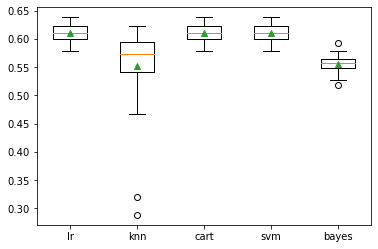

In [70]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model,onehot_encoded, y_a)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [109]:
result_1.to_csv(r'first_set6000.csv', index = False)
result_2.to_csv(r'second_set6000.csv', index = False)
result_3.to_csv(r'third_set6000.csv', index = False)
result_4.to_csv(r'fourth_set6000.csv', index = False)